## 4. Interferenzstatistik

### Aufgabe: Unterscheidet sich das durchschnittliche Ausleihverhalten von jungen und älteren BibliotheksnutzerInnen signifikant voneinander?

In [1]:
# Datensatz einlesen
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set()

df = pd.read_csv('../data/Library_Usage.csv')

# Filter BibliothekskundInnen, die sich 2010 registriert haben und 2016 noch aktiv sind
row_filter = (df['Year Patron Registered'] == 2010) & (df['Circulation Active Year'] == 2016)
df_interf = df.loc[row_filter]
df_interf['Patron Type Definition'].unique()

array(['Teen', 'Adult', 'Senior'], dtype=object)

In [2]:
# Series der Total Checkouts erstellen für jeweils Patron Type Definition 'Teen' und 'Senior'
row_filter_young = df_interf['Patron Type Definition'] == 'Teen'
row_filter_senior = df_interf['Patron Type Definition'] == 'Senior'

df_young = df_interf.loc[row_filter_young]
df_senior = df_interf.loc[row_filter_senior]

# Wieviele Beobachtungen sind in den Subpopulationen?
# Deren Mittelwerte (Median)?
# Bestehen signifikante Unterschiede?

In [3]:
df_young['Total Checkouts'].describe()

count      55.000000
mean      194.654545
std       323.536604
min         3.000000
25%        32.500000
50%        63.000000
75%       213.500000
max      1588.000000
Name: Total Checkouts, dtype: float64

In [4]:
df_senior['Total Checkouts'].describe()

count      2.000000
mean      56.000000
std       79.195959
min        0.000000
25%       28.000000
50%       56.000000
75%       84.000000
max      112.000000
Name: Total Checkouts, dtype: float64

In [5]:
# Berechne das Konfidenzinterval für die Differenz der Mediane mit dem Bootstrapping-Verfahren. 
# Signifikanz-Niveau alpha = 0.01

In [6]:
# Unterscheiden sich die Mittelwerte?

In [7]:
# Wie ändert sich das Ergebnis, wenn du das Signifikanz-Niveau änderst?

### 4.1 Bootstrapping-Verfahren

In [8]:
df_interf['Total Renewals'].describe()

count     81.000000
mean      29.135802
std       73.780714
min        0.000000
25%        0.000000
50%        3.000000
75%       23.000000
max      469.000000
Name: Total Renewals, dtype: float64

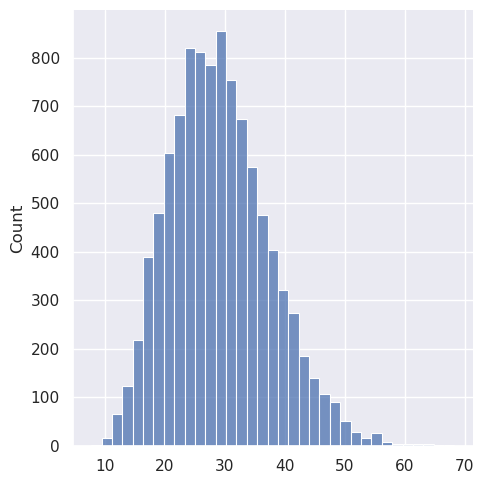

In [9]:
x = df_interf['Total Renewals']
x.sample(n=len(x),replace=True)

x_means = []
S = 10000
for i in range(S):
    x_mean = x.sample(n=len(x),replace=True).mean()
    x_means.append(x_mean)

sns.displot(x_means,kde=False,bins=35)


In [10]:
x_means = pd.Series(x_means)
x_means.between(89,92).mean()

0.0

In [11]:
# Wie groß muss man das Intervall wählen, so dass 90% aller Bootstrapping-Mittelwerte darin liegen? pd.Series.quantile

### 4.2 Konfidenz und Signifikanz

In [20]:
# Berechne ein 90%-Konfidenzintervall jeweils für den Mittelwert und den Median der Variablen Total Renewals und Total Checkouts

### Beispiele aus dem Skript

In [12]:
import pandas as pd
x = pd.Series([21,13,8,14,10,12,5])
x.mean()

11.857142857142858

In [13]:
# simulierte Bootstrapping-Stichprobe
x.sample(n=len(x),replace=True)

4    10
4    10
2     8
0    21
1    13
1    13
3    14
dtype: int64

In [14]:
# Anzahl der Simulationen S = 10000
x_means = []
S = 10000
for i in range(S):
    x_mean = x.sample(n=len(x),replace=True).mean()
    x_means.append(x_mean)

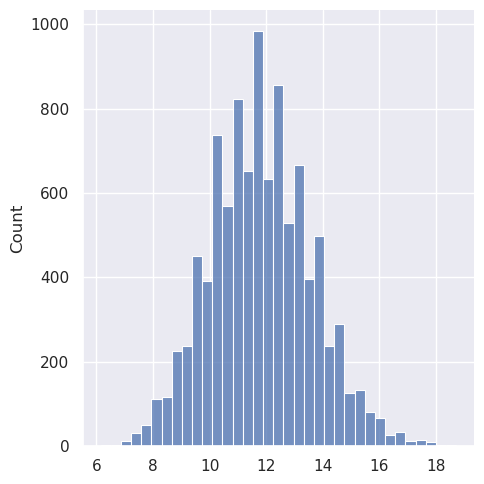

In [15]:
%matplotlib inline
import seaborn as sns
sns.set()
sns.displot(x_means,kde=False,bins=35)

In [16]:
x_means = pd.Series(x_means)
x_means.between(9,11).mean()

0.2989

#### Konfidenzintervalle und Signifikanz

In [17]:
x_means = pd.Series(x_means)
alpha = 0.10
x_means.quantile((alpha/2,1-alpha/2))

0.05     9.000000
0.95    14.714286
dtype: float64

#### Mittelwertvergleiche

In [18]:
import pandas as pd

alpha = 0.05
S = 10000
x = pd.Series([3,3,5,8,7,3,2,5,8,1])
y = pd.Series([3,10,9,8,2,3,6,7,11,6])

print((x.mean(),y.mean()))

(4.5, 6.5)


In [19]:
dxy = []
for i in range(S):
    x_mean = x.sample(n=len(x),replace=True).mean()
    y_mean = y.sample(n=len(y),replace=True).mean()
    dxy.append(x_mean - y_mean)
    
pd.Series(dxy).quantile((alpha/2,1-alpha/2))

0.025   -4.3
0.975    0.4
dtype: float64